In [1]:
#MAN TEST
from scipy.stats import mannwhitneyu
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

df = pd.read_csv('measurements/normalized/NL10131_2012_2021.csv', parse_dates=[0])
df.head(5)

,Datetime,NH3,Lat,Lon,Station
0,2012-01-01 04:00:00,0.105955,51.54052,5.85307,NL10131
1,2012-01-01 05:00:00,0.119305,51.54052,5.85307,NL10131
2,2012-01-01 06:00:00,0.119305,51.54052,5.85307,NL10131
3,2012-01-01 07:00:00,0.119305,51.54052,5.85307,NL10131
4,2012-01-01 08:00:00,0.119305,51.54052,5.85307,NL10131


In [5]:
#append the day of the week to each data point (row)
def add_weekday_column(df, date_column):
    df['weekday'] = df[date_column].dt.day_name()
    return df

df_weekdays_2012_2021 = add_weekday_column(df, 'Datetime')
df_weekdays_2012_2021.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
0,2012-01-01 04:00:00,0.105955,51.54052,5.85307,NL10131,Sunday
1,2012-01-01 05:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
2,2012-01-01 06:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
3,2012-01-01 07:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
4,2012-01-01 08:00:00,0.119305,51.54052,5.85307,NL10131,Sunday


In [6]:
#append the day of the week to each data point (row)
def add_weekday_column(df, date_column):
    df['weekday'] = df[date_column].dt.day_name()
    return df

df= add_weekday_column(df, 'Datetime')
df.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
0,2012-01-01 04:00:00,0.105955,51.54052,5.85307,NL10131,Sunday
1,2012-01-01 05:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
2,2012-01-01 06:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
3,2012-01-01 07:00:00,0.119305,51.54052,5.85307,NL10131,Sunday
4,2012-01-01 08:00:00,0.119305,51.54052,5.85307,NL10131,Sunday


In [7]:
#range of dates compatible with datetime format. 
start_date, end_date =  '2019-01-01', '2019-06-27'
date_range = pd.date_range(start=start_date, end=end_date)

df_subset = df_weekdays_2012_2021[df_weekdays_2012_2021['Datetime'].isin(date_range)]
df_subset.head(5)

,Datetime,NH3,Lat,Lon,Station,weekday
60177,2019-01-01,0.096855,51.54052,5.85307,NL10131,Tuesday
60201,2019-01-02,0.074334,51.54052,5.85307,NL10131,Wednesday
60225,2019-01-03,0.295155,51.54052,5.85307,NL10131,Thursday
60249,2019-01-04,0.339628,51.54052,5.85307,NL10131,Friday
60273,2019-01-05,0.208526,51.54052,5.85307,NL10131,Saturday


In [8]:
import pandas as pd
import datetime

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
df_weekdays = df_subset[df_subset['weekday'].isin(weekdays)]
df_weekends = df_subset[df_subset['weekday'].isin(weekends)]

df_weekdays["weekday"].describe()
df_weekends["weekday"].describe()

#weekdays


U1, p = mannwhitneyu(df_weekdays["NH3"], df_weekends["NH3"], method="exact")

print(U1, p)
#print(weekends)

3002.5 0.5259962184470519


[]

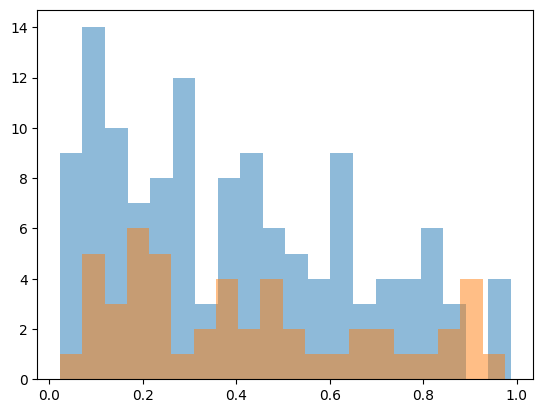

In [9]:
plt.hist(df_weekdays['NH3'], bins=20, alpha=0.5)
plt.hist(df_weekends['NH3'], bins=20, alpha=0.5)
plt.plot()

In [2]:
#create boxplot based on date_range form previous cell.
f = plt.figure(figsize=(6,6))
sns.set_style('ticks')

ax.set(xlabel='Days of the week', ylabel='normalized NH3 levels', title='NL10131 normalized NH3 values from '
       +str(start_date)+" to "+str(end_date)+".")
f.tight_layout()
f.savefig(f"output/boxplotNH3_" + str(start_date)+"_"+str(end_date)+".png", dpi=300)
f.show()

NameError: name 'df_subset' is not defined

<Figure size 600x600 with 0 Axes>